### Exercise 1.2

This exercise start from a give 2-d flow field, plot the velocity, then compute the divergence, plot the divergence.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

#### Step 1: compute velocity on a grid and plot

(todo: import a figure)

In [2]:
def compute_velocity(x, y, vx0, vy0, xsize, ysize):
    '''
    compute velocity on x and y
    Inputs:
        x (float): x coordinate
        y (float): y coordinate
        vx0 (float): pre-factor for vx
        vy0 (float): pre-factor for vy
        xsize (float): size of the grid in x dimention
        ysize (float): size of the grid in y dimention
    '''
    vx = -vx0*np.sin(np.pi*x/xsize*2)*np.cos(np.pi*y/ysize)
    vy =vy0*np.sin(np.pi*y/ysize)*np.cos(np.pi*x/xsize*2)
    return vx,vy

In [3]:
# make a grid
xsize = 1e6
ysize = 1.5e6
xnum = 31
ynum = 31
xs = np.linspace(0.0, xsize, xnum)
ys = np.linspace(0.0, ysize, ynum)
Xs, Ys = np.meshgrid(xs,ys)

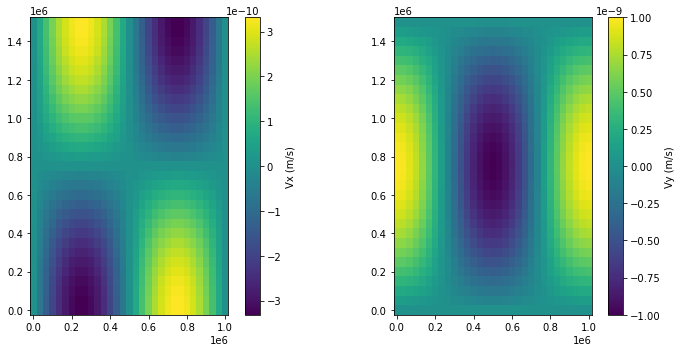

In [5]:
# compute velocity
vx0 = 1e-9*xsize/2/ysize
vy0 = 1e-9
Vx, Vy = compute_velocity(Xs, Ys, vx0, vy0, xsize, ysize)
# plot Vx, Vy
fig = plt.figure(tight_layout=True, figsize=(15, 5))
gs = gridspec.GridSpec(1, 3)
ax = fig.add_subplot(gs[0, 0])
h=ax.pcolormesh(Xs, Ys, Vx)
ax.set_aspect('equal', adjustable='box')
fig.colorbar(h, ax=ax, label='Vx (m/s)')
ax = fig.add_subplot(gs[0, 1])
ax.set_aspect('equal', adjustable='box')
h=ax.pcolormesh(Xs, Ys, Vy)
fig.colorbar(h, ax=ax, label='Vy (m/s)')
fig.show()

#### Step 2: compute diversity on a grid and plot

(todo) insert formula

Note: if we use the value of vx0 and vy0 as before, the derivative is essentially 0.0

In [6]:
def compute_velocity_derivative(x, y, vx0, vy0, xsize, ysize):
    '''
    compute velocity on x and y
    Inputs:
        x (float): x coordinate
        y (float): y coordinate
        vx0 (float): pre-factor for vx
        vy0 (float): pre-factor for vy
        xsize (float): size of the grid in x dimention
        ysize (float): size of the grid in y dimention
    '''
    # dVx/dx
    dvxdx = -vx0*np.pi/xsize*2*np.cos(np.pi*x/xsize*2)*np.cos(np.pi*y/ysize)
    # dVy/dy
    dvydy = vy0*np.pi/ysize*np.cos(np.pi*y/ysize)*np.cos(np.pi*x/xsize*2)
    return dvxdx + dvydy

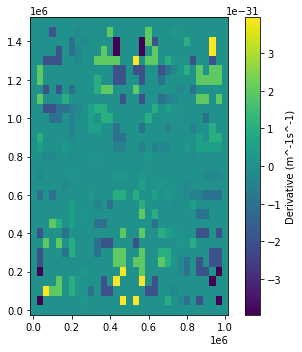

In [7]:
# compute the derivative
DIVs = compute_velocity_derivative(Xs, Ys, vx0, vy0, xsize, ysize)
# plot
fig = plt.figure(tight_layout=True, figsize=(5, 5))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.set_aspect('equal', adjustable='box')
h=ax.pcolormesh(Xs, Ys, DIVs)
fig.colorbar(h, ax=ax, label='Derivative (m^-1s^-1)')
fig.show()